In [1]:
import os
import glob
import logging

# EOReader
from eoreader.reader import Reader
from eoreader.bands import *
from eoreader.env_vars import DEM_PATH

In [2]:
# Create logger

logger = logging.getLogger("eoreader")
logger.setLevel(logging.INFO)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)

# create formatter
formatter = logging.Formatter('%(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

In [3]:
# Set a DEM
os.environ[DEM_PATH] = os.path.join("/home", "data", "DS2", "BASES_DE_DONNEES", "GLOBAL",
                                    "MERIT_Hydrologically_Adjusted_Elevations", "MERIT_DEM.vrt")

# Open your product
path = glob.glob(os.path.join("/home", "data", "DATA", "PRODS", "PLEIADES", "5547047101", "IMG_PHR1A_PMS_001"))[0]
reader = Reader()
prod = reader.open(path, remove_tmp=True)
prod

EOReader PldProduct
Attributes:
	condensed_name: 20200511T023158_PLD_ORT_PMS
	name: PHR1A_PMS_202005110231585_ORT_5547047101
	path: /home/data/DATA/PRODS/PLEIADES/5547047101/IMG_PHR1A_PMS_001
	platform: Pleiades
	sensor type: Optical
	product type: Ortho Single Image
	default resolution: 0.5
	acquisition datetime: 2020-05-11T02:31:58
	band mapping:
		BLUE: 3
		GREEN: 2
		RED: 1
		NIR: 4
		NARROW_NIR: 4
	tile name: N/A
	needs_extraction: False

In [4]:
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")

Acquisition datetime: 2020-05-11 02:31:58
Condensed name: 20200511T023158_PLD_ORT_PMS


/opt/conda/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

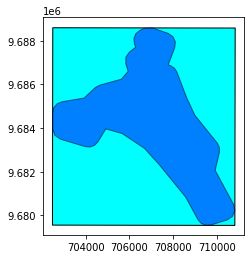

In [5]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()
base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [6]:
# Select the bands you want to load
bands = [GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE]

# Be sure they exist for Pleiades sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # Pleiades doesn't provide TIR and SHADOWS bands

['GREEN', 'NDVI', 'CLOUDS', 'HILLSHADE']


In [7]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

Reprojecting band NIR to UTM with a 0.5 m resolution.


Reprojecting band GREEN to UTM with a 0.5 m resolution.


Reprojecting band RED to UTM with a 0.5 m resolution.


<xarray.DataArray 'GREEN' (band: 1, y: 18124, x: 16754)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.024e+05 7.024e+05 ... 7.108e+05 7.108e+05
  * y            (y) float64 9.689e+06 9.689e+06 9.689e+06 ... 9.68e+06 9.68e+06
    spatial_ref  int64 0
Attributes:
    scale_factor:      1.0
    add_offset:        0.0
    long_name:         GREEN
    sensor:            Pleiades
    sensor_id:         PLD
    product_path:      /home/data/DATA/PRODS/PLEIADES/5547047101/IMG_PHR1A_PM...
    product_name:      PHR1A_PMS_202005110231585_ORT_5547047101
    product_filename:  IMG_PHR1A_PMS_001
    product_type:      Ortho Single Image
    acquisition_date:  20200511T023158
    condensed_name:    20200511T023158_PLD_ORT_PMS

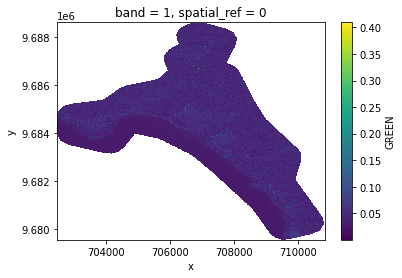

In [8]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

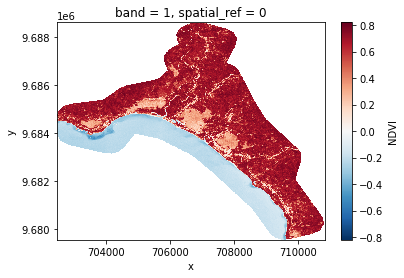

In [9]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

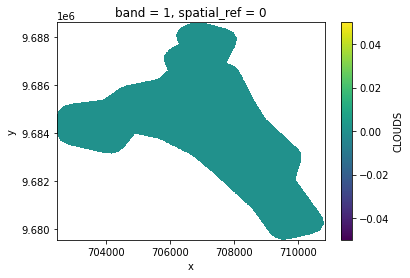

In [10]:
# Plot a subsampled version
band_dict[CLOUDS][:, ::10, ::10].plot()

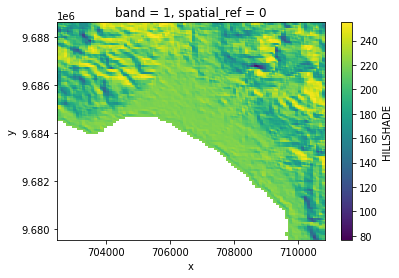

In [11]:
# Plot a subsampled version
band_dict[HILLSHADE][:, ::10, ::10].plot()

In [12]:
# You can also stack those bands
stack = prod.stack(ok_bands)

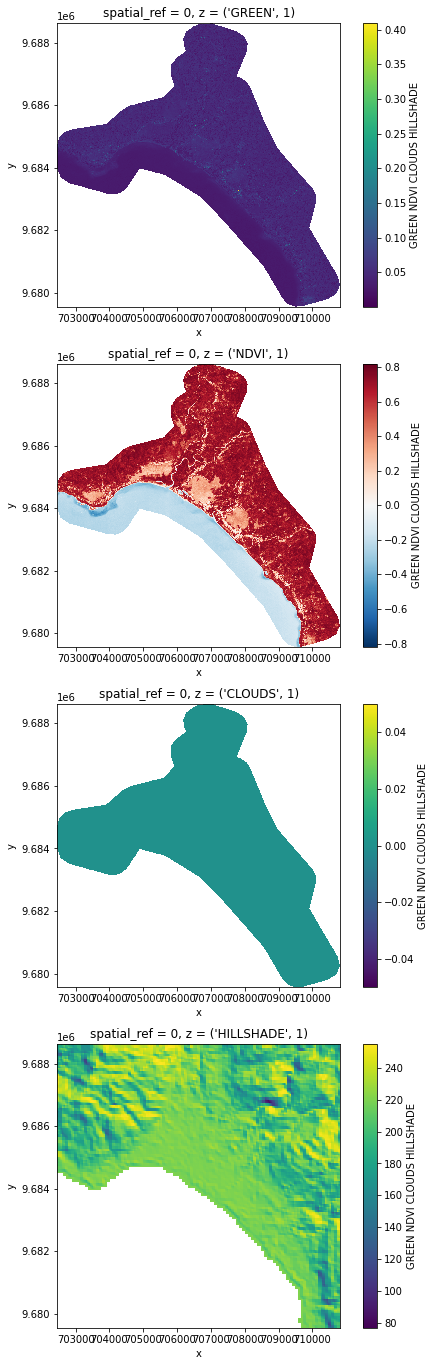

In [13]:
# Plot a subsampled version
import matplotlib.pyplot as plt

nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])